In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0102.csv'
case0102 = pd.read_csv(path)
case0102.head()

,Salary,Sex
0,3900,Female
1,4020,Female
2,4290,Female
3,4380,Female
4,4380,Female


In [3]:
case0102['Salary'].describe()

count      93.000000
mean     5420.322581
std       709.587222
min      3900.000000
25%      4980.000000
50%      5400.000000
75%      6000.000000
max      8100.000000
Name: Salary, dtype: float64

In [4]:
data_female = case0102.query("Sex == 'Female'")
data_female

,Salary,Sex
0,3900,Female
1,4020,Female
2,4290,Female
3,4380,Female
4,4380,Female
...,...,...
56,6000,Female
57,6000,Female
58,6120,Female
59,6300,Female


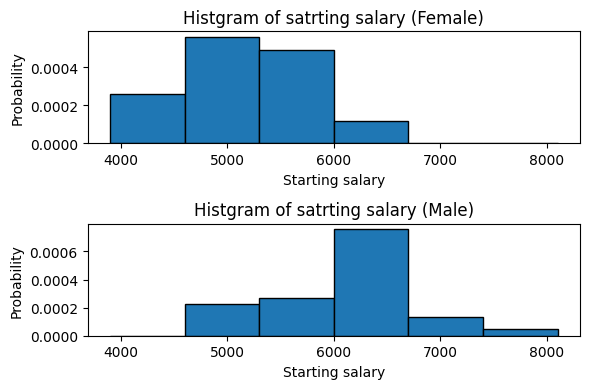

In [5]:
plt.figure(figsize=(6, 4))

plt.subplot(2, 1, 1)
plt.hist(data_female["Salary"], bins = 6, range = (3900, 8100), edgecolor = 'black', density = True)
plt.title("Histgram of satrting salary (Female)")
plt.xlabel("Starting salary")
plt.ylabel("Probability")

data_male = case0102.query("Sex == 'Male'")
plt.subplot(2, 1, 2)

plt.hist(data_male["Salary"], bins = 6, range = (3900, 8100), edgecolor = 'black', density = True)
plt.title("Histgram of satrting salary (Male)")
plt.xlabel("Starting salary")
plt.ylabel("Probability")

plt.tight_layout()
plt.show()

In [6]:
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case1202.csv'
case1202 = pd.read_csv(path)
case1202.head()

,Bsal,Sal77,Sex,Senior,Age,Educ,Exper
0,5040,12420,Male,96,329,15,14.0
1,6300,12060,Male,82,357,15,72.0
2,6000,15120,Male,67,315,15,35.5
3,6000,16320,Male,97,354,12,24.0
4,6000,12300,Male,66,351,12,56.0


In [8]:
case1202.describe(include = "all")

,Bsal,Sal77,Sex,Senior,Age,Educ,Exper
count,93.000000,93.000000,93,93.000000,93.000000,93.000000,93.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Female,NaN,NaN,NaN,NaN
freq,NaN,NaN,61,NaN,NaN,NaN,NaN
mean,5420.322581,10392.903226,NaN,82.279570,474.397849,12.505376,100.927419
std,709.587222,1789.640831,NaN,10.254761,140.210489,2.282369,90.946985
min,3900.000000,7860.000000,NaN,65.000000,280.000000,8.000000,0.000000
25%,4980.000000,9000.000000,NaN,74.000000,349.000000,12.000000,35.500000
50%,5400.000000,10020.000000,NaN,84.000000,468.000000,12.000000,70.000000
75%,6000.000000,11220.000000,NaN,90.000000,590.000000,15.000000,144.000000


In [9]:
case1202['Sex'].value_counts()

Female    61
Male      32
Name: Sex, dtype: int64

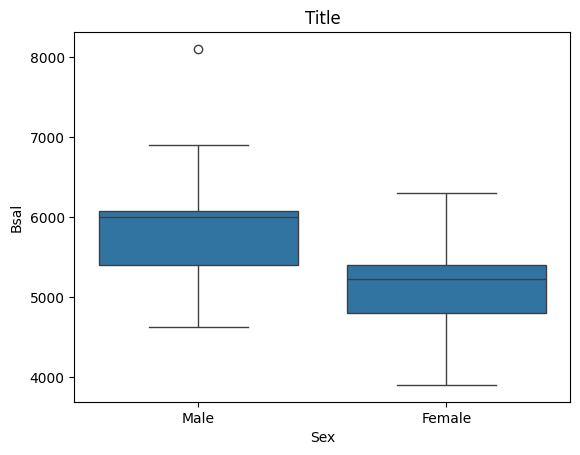

In [10]:
# Box plot of starting salary
sns.boxplot(x = case1202["Sex"], y = case1202["Bsal"])
plt.title("Title")
plt.show()

In [13]:
median_salary = np.median(case1202[case1202["Sex"]=='Female']["Bsal"])
print(f'female median salary = {median_salary}')

median_salary = np.median(case1202[case1202["Sex"]=='Male']["Bsal"])
print(f'Male median salary = {median_salary}')

female median salary = 5220.0
Male median salary = 6000.0


In [14]:
#IQR
iqr = np.percentile(case1202['Bsal'], 75) - np.percentile(case1202['Bsal'], 25)
print(f'IQR = {iqr}')

IQR = 1020.0


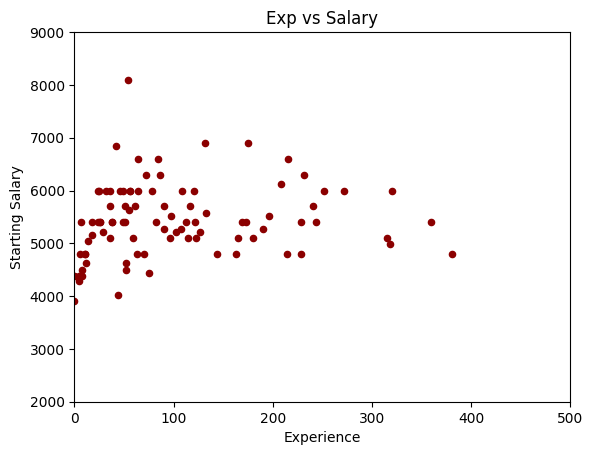

In [16]:
plt.figure()
plt.scatter(case1202['Exper'], case1202["Bsal"], color = 'darkred', marker = 'o', s = 20)
plt.xlim(0, 500)
plt.ylim(2000, 9000)
plt.title('Exp vs Salary')
plt.xlabel('Experience')
plt.ylabel("Starting Salary")
plt.show()


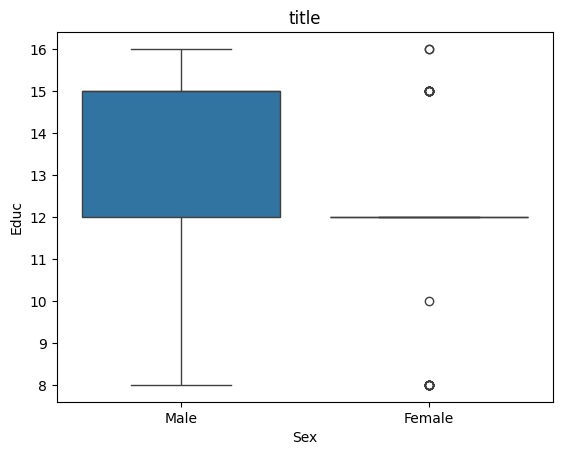

In [17]:
sns.boxplot(x = case1202['Sex'], y = case1202['Educ'])
plt.title("title")
plt.show()

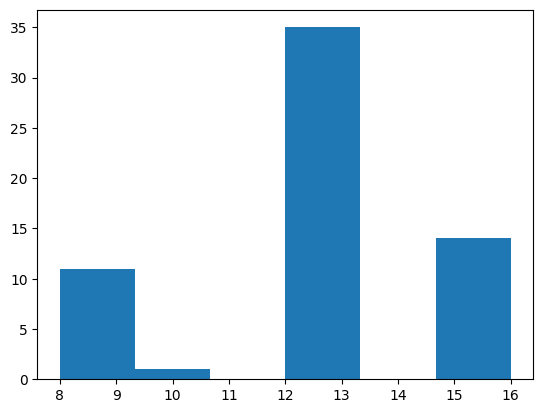

In [18]:
data_female = case1202.query("Sex=='Female'")
plt.hist(data_female["Educ"], bins = 6, density = False)
plt.show()

In [21]:
# code a new variable "college"
case1202['college'] = np.where(case1202['Educ']<=12, 'no', 'yes')
data = pd.DataFrame(case1202)
data.head()

,Bsal,Sal77,Sex,Senior,Age,Educ,Exper,college
0,5040,12420,Male,96,329,15,14.0,yes
1,6300,12060,Male,82,357,15,72.0,yes
2,6000,15120,Male,67,315,15,35.5,yes
3,6000,16320,Male,97,354,12,24.0,no
4,6000,12300,Male,66,351,12,56.0,no


In [23]:
data_category = pd.crosstab(data['college'], data['Sex'])
data_category

Sex,Female,Male
college,,
no,47,15
yes,14,17


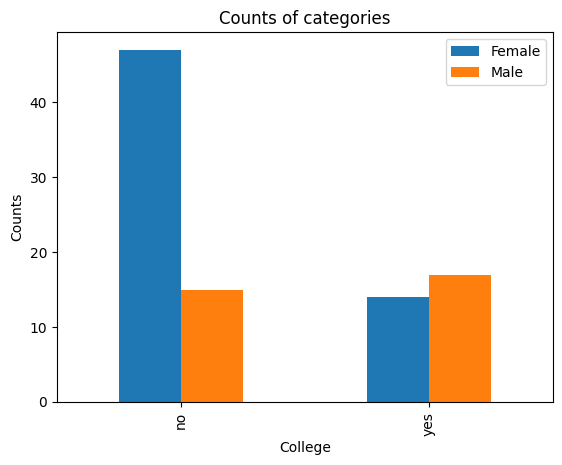

In [25]:
data_category.plot(kind = 'bar', stacked = False)
plt.xlabel("College")
plt.ylabel("Counts")
plt.title("Counts of categories")
plt.legend(data_category.columns)
plt.show()

In [26]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 5.9 MB/s eta 0:00:00


In [27]:
import pingouin as pg

In [28]:
#perfrom a two-sample t-test using pingouin
pg.ttest(x = case0102[case0102["Sex"]=='Male']['Salary'], y = case0102[case0102["Sex"]=='Female']['Salary'] , correction = True, confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.829974,51.32884,two-sided,3.710296e-07,"[536.38, 1099.67]",1.37351,1.338e+05,0.99999


In [29]:
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/ex0126.csv'
ex0126 = pd.read_csv(path)
ex0126.head()

,State,Representative,Party,Pro05,Anti05,Pro06,Anti06,Pro07,Anti07,PctPro
0,Alabama,Bonner,R,2.0,16.0,3.0,9.0,2.0,18.0,14.00
1,Alabama,Everett,R,0.0,18.0,1.0,11.0,2.0,18.0,6.00
2,Alabama,Rogers,R,1.0,17.0,2.0,10.0,3.0,17.0,12.00
3,Alabama,Aderholt,R,0.0,18.0,0.0,12.0,2.0,18.0,4.00
4,Alabama,Cramer,D,5.0,13.0,4.0,7.0,14.0,6.0,46.94


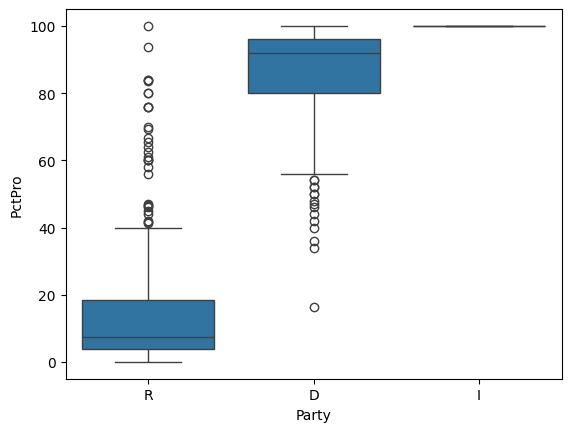

In [30]:
plt.figure()
sns.boxplot(x = ex0126['Party'], y = ex0126['PctPro'])
plt.show()

In [32]:
HouseSubset = ex0126[ex0126["Party"] != 'I']
pg.ttest(HouseSubset[HouseSubset["Party"]=="D"]["PctPro"],
         HouseSubset[HouseSubset["Party"]=="R"]["PctPro"], correction = True, confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,42.043058,448.554055,two-sided,1.056232e-157,"[66.47, 72.98]",3.795466,8.455e+159,1.0


In [ ]:
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/ex0127.csv'